In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
sns.set_style("darkgrid")

In [183]:
df1= pd.read_csv('Banglore_housing_data.csv')


In [184]:
# Dimension of data frame  
df1.shape

(13320, 9)

In [185]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [186]:
# total_sqft has defferent types like in sqft meter, cents so conver all dimension into sqft 
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [187]:
df1['total_sqft'] = df1.total_sqft.str.split('-').apply(preprocess_total_sqft)
df1.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310.0,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020.0,6.0,NaN,370.00


In [196]:
# checking missing value in dataset
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

 Missing Value visulization
 

2.0        0.383859
1.0        0.367643
3.0        0.125526
0.0        0.077252
missing    0.045721
Name: balcony, dtype: float64


[Text(0.5, 1.0, 'Missing Value Visualization For Training Dataset \n Column : Balcony')]

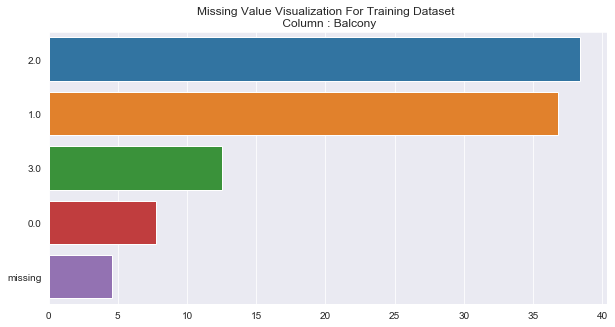

In [197]:
fig, ax = plt.subplots(figsize=(10, 5))
train_couts = df1['balcony'].fillna('missing').value_counts(normalize=True)
print(train_couts)
sns.barplot(y = train_couts.index, x= train_couts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Balcony')

[Text(0.5, 1, 'Missing Value Visualization For Training Dataset \n Column : Bathroom')]

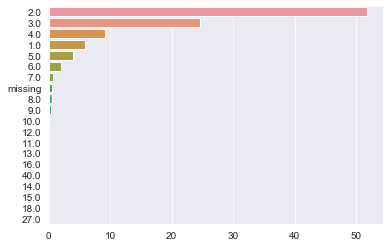

In [189]:
train_counts = df1['bath'].fillna('missing').value_counts(normalize=True)
#print(train_counts)
sns.barplot(y = train_counts.index, x= train_counts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Bathroom')
#plt.savefig("Graph/Bathroom Data Visualization")

[Text(0.5, 1.0, 'Missing Value Visualization \n Column : Area Type')]

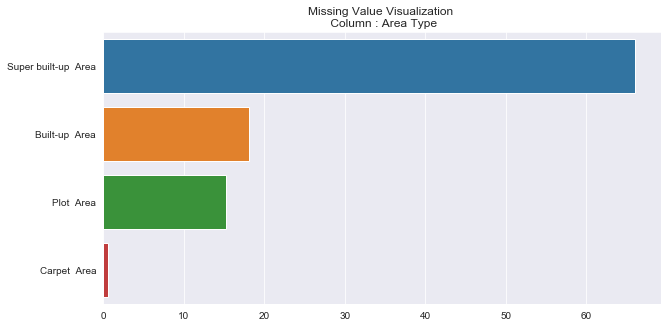

In [190]:
fig, ax = plt.subplots(figsize=(10, 5))
train_counts = df1['area_type'].fillna('missing').value_counts(normalize=True)
g=sns.barplot(y = train_counts.index, x= train_counts.values*100)
ax.set(title='Missing Value Visualization \n Column : Area Type')

In [227]:
# get no of bedrooms from size columns
df2=df1.dropna(subset=['size'])
df2['no_of_bedrooms']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

C:\Users\primi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,no_of_bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2


In [228]:
# checking missing value in dataset
df2.isnull().sum()

area_type            0
availability         0
location             1
size                 0
society           5499
total_sqft           0
bath                57
balcony            593
price                0
no_of_bedrooms       0
dtype: int64

In [229]:
print("percentage of Missing Values Society Column In Train dataset :")
int(5502/df2.shape[0]*100)

percentage of Missing Values Society Column In Train dataset :


41

In [230]:
# society columns has more than 40% null values and availability column is not relavant so we drop those features
df2=df2.drop(['availability','society'],axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [231]:
# checking missing value in dataset
df2.isnull().sum()

area_type           0
location            1
size                0
total_sqft          0
bath               57
balcony           593
price               0
no_of_bedrooms      0
dtype: int64

In [232]:
# Handle balcony column
print(df2.shape)
df2.groupby('bath')['bath'].agg('count').sort_values(ascending=False)

(13304, 8)


bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
15.0       1
18.0       1
40.0       1
Name: bath, dtype: int64

In [233]:
# More than 50% has mode value as bath .Assign mode value of bath columns to missing values in bath columns
bath_mode = df2['bath'].mode()[0]
df2.loc[df2['bath'].isna(), 'bath']=bath_mode
df2.isnull().sum()

area_type           0
location            1
size                0
total_sqft          0
bath                0
balcony           593
price               0
no_of_bedrooms      0
dtype: int64

In [234]:
# Handle balcony column
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [235]:
balcony_med = df2['balcony'].median()
df2.loc[df2['balcony'].isna(), 'balcony'] = balcony_med
df2.isnull().sum()

area_type         0
location          1
size              0
total_sqft        0
bath              0
balcony           0
price             0
no_of_bedrooms    0
dtype: int64

In [236]:
df2=df2.dropna()
df2.shape

(13303, 8)

In [237]:
# Add new feature price per sqft 
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [238]:
# Explore location column 
df2['location']=df2.location.apply(lambda x:x.strip())
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [239]:
# put all locations as 'other' category is it occures less than 10
location_stats_less_than_10=location_stats[location_stats<=10]
df2['location']=df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [240]:
df2[df2.total_sqft/df2.no_of_bedrooms<300]
#df4.boxplot(column=['total_sqft'])

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [241]:
df3=df2[~(df2.total_sqft/df2.no_of_bedrooms<300)]
df3.shape

(12555, 9)

In [242]:
df3.price_per_sqft.describe()

count     12555.000000
mean       6297.884049
std        4161.953299
min           2.257423
25%        4206.383623
50%        5292.682927
75%        6916.831357
max      176470.588235
Name: price_per_sqft, dtype: float64

In [243]:
# There is huge variation in price_per_sqft for same location so we can remove outlier by using std and mean

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10315, 9)

In [251]:
# #It is unusual to have 2 more bathrooms than number of bedrooms in a home so we remove that outlier
df5=df4[df4.bath<=df4.no_of_bedrooms+2]
print(df5.shape)
df5.bath.unique()

(10311, 9)


array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [252]:
df5.to_csv('bangalore_house_data_cleaned.csv',index=False)